# **Question-2.**

Using steepest gradient descent, find all the local minima for the function  **J(x1, x2) = (x1^2+x2−11)^2+(x1+x2^2−7)^2.**

While applying gradient descent, do the following:

**(a)** Fixing the value for alpha. 

**(b)** use line search to determine the value for alpha.

Plot the intermediate steps in the iteration to show one of the minimal point.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescent:
    def __init__(self, alpha=0.01, max_iter=10000, eps=1e-6):
        self.alpha = alpha
        self.max_iter = max_iter
        self.eps = eps

    def function(self, x):
        return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

    def gradient(self, x):
        return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7), 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)])

    def descent(self, initial_point):
        x = initial_point
        x_history = [x]
        J_history = [self.function(x)]

        for _ in range(self.max_iter):
            x_prev = x
            x = x - self.alpha * self.gradient(x)
            x_history.append(x)
            J_history.append(self.function(x))
            if np.linalg.norm(x - x_prev) < self.eps:
                break

        return np.array(x_history), np.array(J_history)

    def plot(self, x_history):
        X1, X2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
        Z = (X1**2 + X2 - 11)**2 + (X1 + X2**2 - 7)**2
        plt.contour(X1, X2, Z, 50)
        plt.plot(x_history[:, 0], x_history[:, 1], 'r.-')
        plt.show()



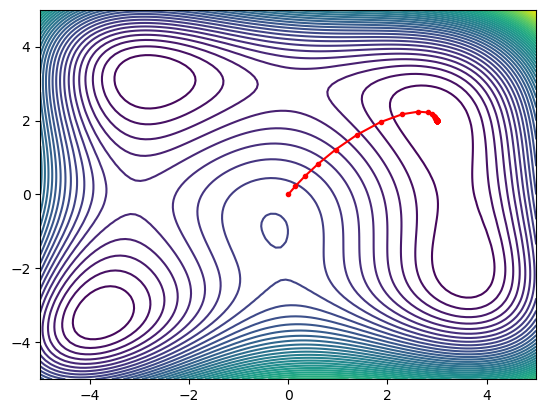

The point of local minimun for initial point [0,0]: [2.99999918 2.00000199]


In [2]:
gd = GradientDescent()
x_history, J_history = gd.descent(np.array([0., 0.]))
gd.plot(x_history)


print("The point of local minimun for initial point [0,0]:",x_history[-1])

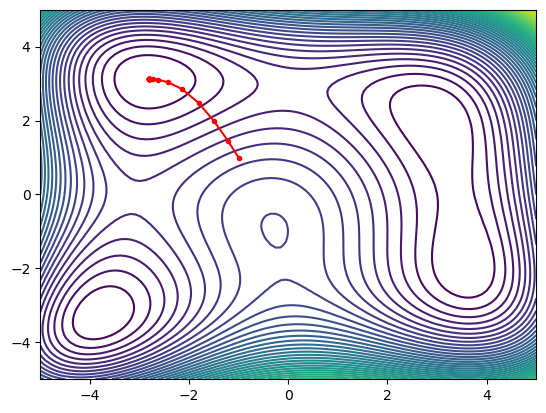

The point of local minimun for initial point [-1,1]: [-2.80511778  3.13131249]


In [3]:
gd = GradientDescent()
x_history, J_history = gd.descent(np.array([-1., 1.]))
gd.plot(x_history)


print("The point of local minimun for initial point [-1,1]:",x_history[-1])

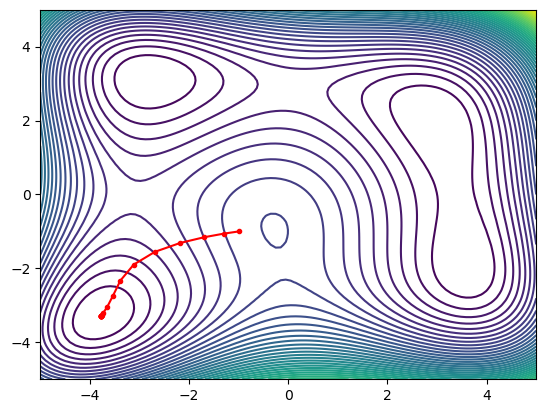

The point of local minimun for initial point [-1,-1]: [-3.77931018 -3.28318587]


In [4]:
gd = GradientDescent()
x_history, J_history = gd.descent(np.array([-1., -1.]))
gd.plot(x_history)


print("The point of local minimun for initial point [-1,-1]:",x_history[-1])

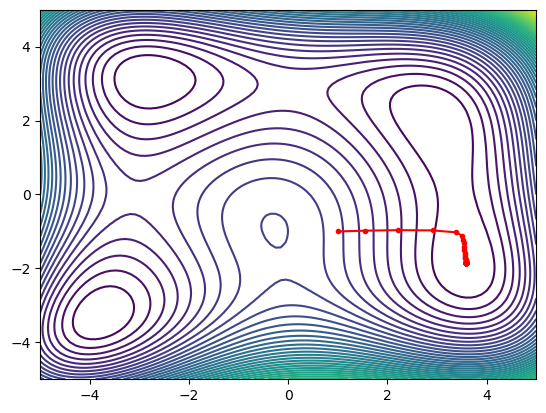

The point of local minimun for initial point [1,-1]: [ 3.58442816 -1.8481246 ]


In [5]:
gd = GradientDescent()
x_history, J_history = gd.descent(np.array([1., -1.]))
gd.plot(x_history)


print("The point of local minimun for initial point [1,-1]:",x_history[-1])

In [6]:
from scipy.optimize import line_search

class GradientDescentLineSearch(GradientDescent):
    def descent(self, initial_point):
        x = initial_point
        x_history = [x]
        J_history = [self.function(x)]

        for _ in range(self.max_iter):
            x_prev = x
            grad = self.gradient(x)
            alpha = line_search(self.function, self.gradient, x, -grad)[0]
            if alpha is None:  # If the line search fails, use the previous alpha
                alpha = alpha_prev
            x = x - alpha * grad
            x_history.append(x)
            J_history.append(self.function(x))
            if np.linalg.norm(x - x_prev) < self.eps:
                break
            alpha_prev = alpha

        return np.array(x_history), np.array(J_history)

 

    def plot(self, x_history):
        X1, X2 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
        Z = (X1**2 + X2 - 11)**2 + (X1 + X2**2 - 7)**2
        plt.contour(X1, X2, Z, 50)
        plt.plot(x_history[:, 0], x_history[:, 1], 'r.-')
        plt.show()

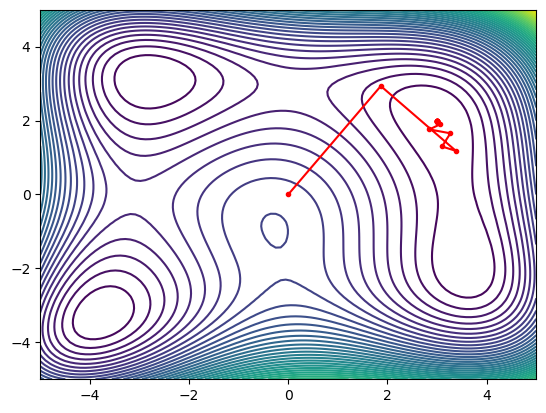

The point of local minimun for initial point [0,0]: [3.00000007 1.99999986]


In [7]:
gdls = GradientDescentLineSearch()

x_history, J_history = gdls.descent(np.array([0, 0]))
gdls.plot(x_history)


print("The point of local minimun for initial point [0,0]:",x_history[-1])

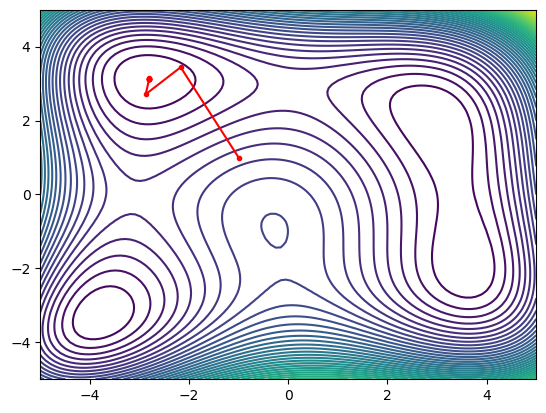

The point of local minimun for initial point [-1,1]: [-2.80511808  3.13131252]


In [8]:
gdls = GradientDescentLineSearch()

x_history, J_history = gdls.descent(np.array([-1, 1]))
gdls.plot(x_history)


print("The point of local minimun for initial point [-1,1]:",x_history[-1])

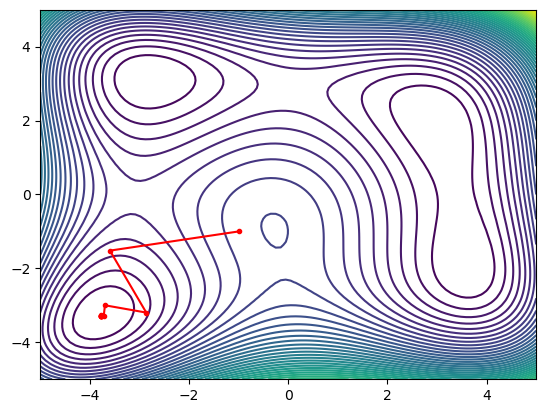

The point of local minimun for initial point [-1,-1]: [-3.7793103  -3.28318587]


In [9]:
gdls = GradientDescentLineSearch()

x_history, J_history = gdls.descent(np.array([-1, -1]))
gdls.plot(x_history)


print("The point of local minimun for initial point [-1,-1]:",x_history[-1])

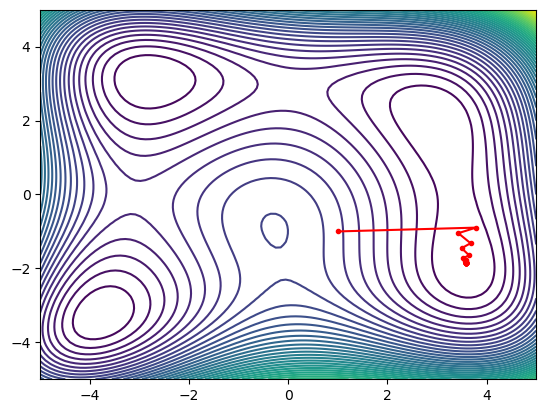

The point of local minimun for initial point [1,-1]: [ 3.58442801 -1.84812591]


In [10]:
gdls = GradientDescentLineSearch()

x_history, J_history = gdls.descent(np.array([1, -1]))
gdls.plot(x_history)


print("The point of local minimun for initial point [1,-1]:",x_history[-1])